In [1]:
import pandas as pd
import seaborn as sn
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.losses,keras.optimizers

In [2]:
from xgboost import XGBClassifier
import joblib
from python_speech_features import mfcc
from sklearn.metrics import f1_score, confusion_matrix

In [3]:
df = pd.read_csv("DATASET-balanced.csv")

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.head(10))
print(y.head(10))

   chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.338055  0.027948        2842.948867         4322.916759  6570.586186   
1     0.443766  0.037838        2336.129597         3445.777044  3764.949874   
2     0.302528  0.056578        2692.988386         2861.133180  4716.610271   
3     0.319933  0.031504        2241.665382         3503.766175  3798.641521   
4     0.420055  0.016158        2526.069123         3102.659519  5025.077899   
5     0.442880  0.012317        3952.880304         3702.717829  7104.089991   
6     0.453897  0.021782        4178.072150         3698.644769  7508.242075   
7     0.474154  0.011107        3993.039753         3948.154333  7872.563956   
8     0.602690  0.000970        3815.431438         3992.517515  6887.564689   
9     0.453962  0.017612        2894.560788         3435.434131  5663.232422   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.041050 -462.169586   90.3112

In [4]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y)
y = lb.transform(y)
y = y.ravel()
print(y)

[0 0 0 ... 1 1 1]


In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, random_state=1)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,  shuffle=True, random_state=1)

print(model)
print("KFold splits: " + str(kf.get_n_splits(X)))

RandomForestClassifier(n_estimators=50, random_state=1)
KFold splits: 5


In [6]:
import time

import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

acc_score = []
prec_score = []
rec_score = []
f1s = []
MCCs = []
ROCareas = []

start = time.time()
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
    prec = precision_score(y_test , pred_values, average="binary", pos_label=1)
    prec_score.append(prec)
    
    rec = recall_score(y_test , pred_values, average="binary", pos_label=1)
    rec_score.append(rec)
    
    f1 = f1_score(y_test , pred_values, average="binary", pos_label=1)
    f1s.append(f1)
    
    mcc = matthews_corrcoef(y_test , pred_values)
    MCCs.append(mcc)   
    
    roc = roc_auc_score(y_test , pred_values)
    ROCareas.append(roc)
    
end = time.time()
timeTaken = (end - start)
print("Model trained in: " + str( round(timeTaken, 2) ) + " seconds.")

Model trained in: 23.56 seconds.


In [7]:
print("Mean results and (std.):\n")
print("Accuracy: " + str( round(np.mean(acc_score)*100, 3) ) + "% (" + str( round(np.std(acc_score)*100, 3) ) + ")\n")
print("Precision: " + str( round(np.mean(prec_score), 3) ) + " (" + str( round(np.std(prec_score), 3) ) + ")")
print("Recall: " + str( round(np.mean(rec_score), 3) ) + " (" + str( round(np.std(rec_score), 3) ) + ")")
print("F1-Score: " + str( round(np.mean(f1s), 3) ) + " (" + str( round(np.std(f1s), 3) ) + ")")
print("MCC: " + str( round(np.mean(MCCs), 3) ) + " (" + str( round(np.std(MCCs), 3) ) + ")")
print("ROC AUC: " + str( round(np.mean(ROCareas), 3) ) + " (" + str( round(np.std(ROCareas), 3) ) + ")")

Mean results and (std.):

Accuracy: 98.574% (0.272)

Precision: 0.993 (0.002)
Recall: 0.979 (0.006)
F1-Score: 0.986 (0.003)
MCC: 0.972 (0.005)
ROC AUC: 0.986 (0.003)


# XGBOOST

In [8]:
from sklearn import preprocessing
df = pd.read_csv("DATASET-balanced.csv")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
lb = preprocessing.LabelBinarizer()
lb.fit(y)
y = lb.transform(y)
y = y.ravel()
print(y)

[0 0 0 ... 1 1 1]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

NameError: name 'data' is not defined

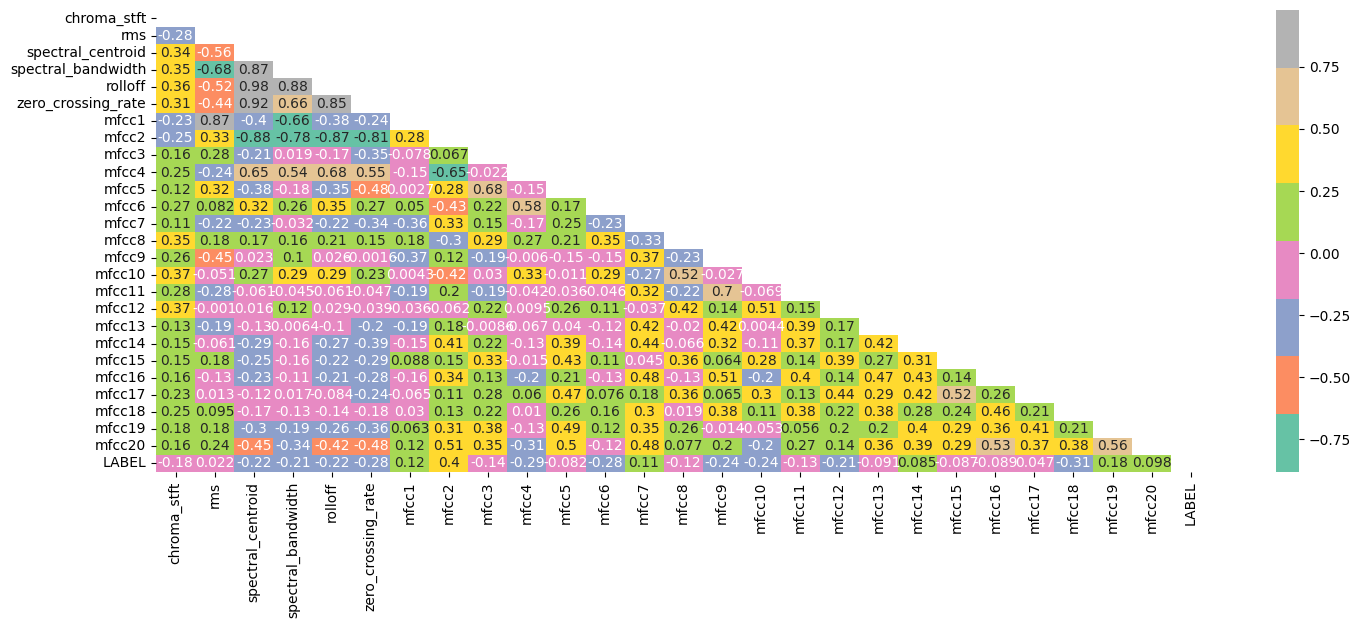

In [ ]:
data = pd.read_csv("DATASET-balanced.csv")
lab=LabelEncoder()
for i in data.select_dtypes(include='object').columns.values:
    data[i]=lab.fit_transform(data[i])
    
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

#correlation_matrix = data.corr()
#sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

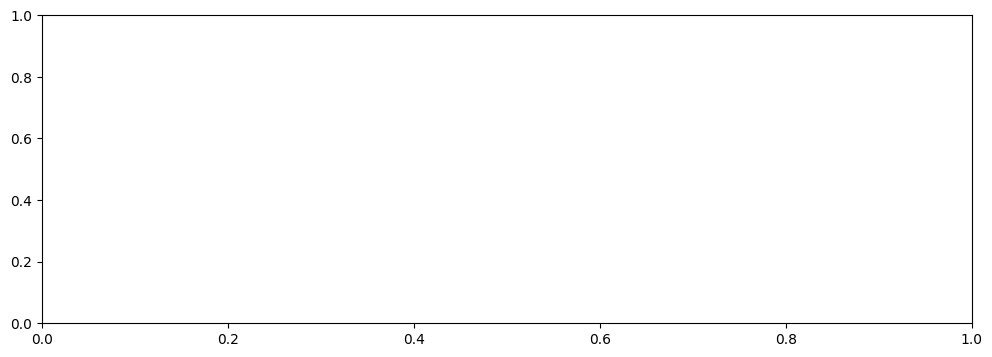

In [ ]:
import librosa
import os
filename=r'AUDIO/REAL/'
for i in os.listdir(filename):
    df, data = librosa.load(f"{filename}{i}")
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(df, sr=data)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    #plt.show()
    
    D = librosa.amplitude_to_db(librosa.stft(df), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=data, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    #plt.show()

In [ ]:
print(data)

22050


In [ ]:
data = pd.read_csv("DATASET-balanced.csv")
noise={}
for i in data.select_dtypes(include='number').columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    out=np.abs(data['z-scores'] > 3)
    if out.sum() >0:
        noise[i]=out.sum()

thresh=2.5
for i in noise:
    upper=data[i].mean()+thresh*data[i].std()
    lower=data[i].mean()-thresh*data[i].std()
    data=data[(data[i]>lower)&(data[i]<upper)]


lab=LabelEncoder()
for i in data.select_dtypes(include="object").columns.values:
    data[i]=lab.fit_transform(data[i])
x=[]
corr=data.corr()['LABEL']
corr=corr.drop(['LABEL','z-scores'])
for i in corr.index:
    if corr[i] >0:
        x.append(i)

In [ ]:
import joblib

data = pd.read_csv("DATASET-balanced.csv")
x=data[x]
y=data['LABEL']

x_train,x_test,y_train,y_test=train_test_split(x,y)


#lazy=LazyClassifier()
#models,predict=lazy.fit(x_train,x_test,y_train,y_test)

#print(models)
#print(predict)


lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
print('The logistic regression: ', lr.score(x_test, y_test))

joblib.dump(lr,'modelo_lr.pkl')

#lgb = LGBMClassifier()
#lgb.fit(x_train, y_train)
#print('The LGB', lgb.score(x_test, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train)
joblib.dump(tree,'modelo_tree.pkl')
print('Dtree ', tree.score(x_test,y_test))

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
print('The Linear SVC ',linear_svc.score(x_test,y_test))

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
print('The MLP classifiers ',mlp_classifier.score(x_test,y_test))

The logistic regression:  0.7602716468590832
Dtree  0.8176570458404074


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The Linear SVC  0.6797962648556876
The MLP classifiers  0.8974533106960951


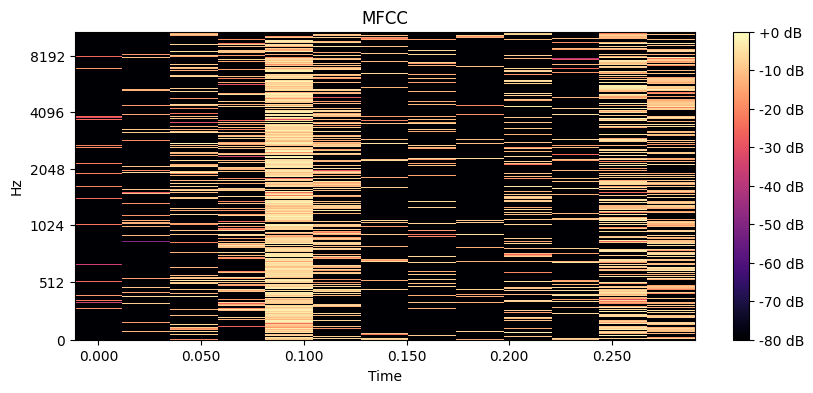

In [ ]:
import librosa
import numpy as np
from python_speech_features import mfcc

# Carregue o áudio usando o librosa
audio_file = 'Audios_WAV/lula_brics_final_treatment.wav'
audio, sr = librosa.load(audio_file)

# Extraia os MFCCs usando o python_speech_features
mfcc_features = mfcc(audio, sr)

# 'mfcc_features' agora contém os coeficientes MFCC do áudio
# Você pode ajustar os parâmetros da função mfcc() de acordo com suas necessidades, como número de coeficientes, tamanho da janela, etc.

# Visualize os MFCCs
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mfcc_features, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()



In [ ]:
import librosa
import librosa.feature
import numpy as np

# Load an example audio file (replace 'audio.wav' with your audio file)
audio_file = 'Audios_WAV/lula_brics_final_treatment.wav'
y, sr = librosa.load(audio_file, sr=None)

# Feature extraction
# Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Chromagram
chroma = librosa.feature.chroma_stft(S=D, sr=sr)

# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(S=np.abs(D), sr=sr)

# Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(S=np.abs(D), sr=sr)

# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(S=np.abs(D), sr=sr, roll_percent=0.85)

# Zero Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# Root Mean Square (RMS)
rms = librosa.feature.rms(y=y)

# Mel-Frequency Cepstral Coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)



In [ ]:
import pandas as pd
import librosa
import numpy as np

# Load an example audio file (replace 'audio.wav' with your audio file)
audio_file = 'Audios_WAV/lula_brics_final_treatment.wav'
y, sr = librosa.load(audio_file, sr=None)

# Feature extraction
# Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y))

# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(S=D, sr=sr)
spectral_centroid_mean = spectral_centroid.mean(axis=1)

# Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(S=D, sr=sr)
spectral_bandwidth_mean = spectral_bandwidth.mean(axis=1)

# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(S=D, sr=sr, roll_percent=0.85)
spectral_rolloff_mean = spectral_rolloff.mean(axis=1)

# Zero Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
zero_crossing_rate_mean = zero_crossing_rate.mean(axis=1)

# Root Mean Square (RMS)
rms = librosa.feature.rms(y=y)
rms_mean = rms.mean(axis=1)

# Mel-Frequency Cepstral Coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
mfccs_mean = mfccs.mean(axis=1)

# Crie um DataFrame com todas as características
features_dict = {
    'spectral_centroid': spectral_centroid_mean[0],
    'spectral_bandwidth': spectral_bandwidth_mean[0],
    'rolloff': spectral_rolloff_mean[0],
    'zero_crossing_rate': zero_crossing_rate_mean[0],
    'rms': rms_mean[0],
    'LABEL': 'REAL'
}

for i in range(20):
    features_dict[f'mfcc{i+1}'] = mfccs_mean[i]

# Converta o dicionário em um DataFrame
df = pd.DataFrame([features_dict])

# Exiba o DataFrame com todas as características em uma única linha
df.to_csv('audio_features.csv', index=False)



In [ ]:
# Carregue o modelo treinado
modelo_carregado = joblib.load('modelo_lr.pkl')

# Use o modelo carregado para fazer previsões
previsoes = modelo_carregado.predict(x_test)

print(previsoes)


['FAKE' 'FAKE' 'REAL' ... 'REAL' 'FAKE' 'FAKE']


In [ ]:
import pandas as pd
import joblib

# Carregue o modelo treinado
modelo_carregado = joblib.load('modelo_lr.pkl')

# Carregue o conjunto de dados de características de áudio
data = pd.read_csv("audio_features.csv")

# Extrair as características de áudio do conjunto de dados
X = data.drop('LABEL', axis=1)  # Substitua 'target_column_name' pelo nome da coluna de rótulos

# Use o modelo para fazer previsões nas características de áudio
previsoes = modelo_carregado.predict(X)

# As previsões agora contêm as saídas do modelo para as características de áudio do seu arquivo CSV
print(previsoes)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- mfcc10
- mfcc11
- mfcc12
- mfcc15
- mfcc18
- ...


In [ ]:
data = pd.read_csv("DATASET-balanced.csv")
data.columns

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')

In [ ]:
import librosa
import numpy as np
from tensorflow import keras  # Ou a biblioteca que você usou para treinar seu modelo

# Carregue o áudio
audio_path = 'Audios_WAV/lula_brics_final_treatment.wav'
y, sr = librosa.load(audio_path, sr=None)  # Carrega o áudio e sua taxa de amostragem

# Extraia as características (exemplo com MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Redimensione as características se necessário (pode variar de acordo com o modelo)
mfccs = mfccs.reshape(1, mfccs.shape[0], mfccs.shape[1])

# Normalize as características se necessário (pode variar de acordo com o modelo)
mfccs = (mfccs - media) / desvio_padrao

# Carregue o modelo treinado
model = keras.models.load_model('modelo_treinado.h5')

# Faça a previsão
previsao = model.predict(mfccs)

# A previsão conterá a probabilidade de ser real ou fake (dependendo do seu modelo)
print(previsao)


NameError: name 'media' is not defined

## Pegando as features de um dos nosso audios

In [15]:
import librosa
import pandas as pd

# Função para extrair as características de áudio
def extrair_caracteristicas(audio, taxa_amostragem):
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=taxa_amostragem)
    chroma_mean = chroma_stft.mean(axis=1)
    chroma_over_mean = chroma_mean.mean()

    rms = librosa.feature.rms(y=audio)
    rms_mean = rms.mean()

    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=taxa_amostragem)
    spectral_centroid_mean = spectral_centroid.mean()

    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=taxa_amostragem)
    spectral_bandwidth_mean = spectral_bandwidth.mean()

    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=taxa_amostragem, roll_percent=0.85)
    spectral_rolloff_mean = rolloff.mean()

    zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
    zero_crossing_rate_mean = zero_crossing_rate.mean()

    mfccs = librosa.feature.mfcc(y=audio, sr=taxa_amostragem, n_mfcc=20)
    mfccs_mean = mfccs.mean(axis=1)

    return (chroma_over_mean, rms_mean, spectral_centroid_mean, spectral_bandwidth_mean, spectral_rolloff_mean, zero_crossing_rate_mean, *mfccs_mean)

# Função para criar o DataFrame a partir dos dados
def criar_dataframe(caminho_audio):
    audio, taxa_amostragem = librosa.load(caminho_audio, sr=None)
    tamanho_janela = taxa_amostragem  # 1 segundo
    label = 'REAL'  # Substitua 'LABEL' pelo rótulo apropriado
    passo = tamanho_janela
    inicio = 0
    fim = tamanho_janela
    dados = []

    while fim <= len(audio):
        segmento = audio[inicio:fim]
        caracteristicas = extrair_caracteristicas(segmento, taxa_amostragem)
        dados.append(caracteristicas + (label,))
        inicio += passo
        fim += passo

    colunas = ['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate',
               'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
               'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20',
               'LABEL']
    df = pd.DataFrame(data=dados, columns=colunas)
    
    return df

# Caminho para o arquivo de áudio
caminho_audio = 'Audios_WAV/Yato_Viva.wav'


# Crie o DataFrame a partir dos dados
df = criar_dataframe(caminho_audio)

# Visualize o DataFrame
print(df)


C:\Users\gabri\AppData\Local\Temp\ipykernel_16656\3119972120.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, taxa_amostragem = librosa.load(caminho_audio, sr=None)
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'Audios_WAV/Yato_Viva.wav'

In [ ]:
df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.583154,0.041656,2462.435525,3157.215373,5863.961476,0.029544,-444.046021,131.045700,-11.478412,21.153355,...,5.432616,3.992613,3.866035,5.890990,0.754963,-1.551783,-5.370465,-3.381092,-4.259582,REAL
1,0.449685,0.068081,1221.263555,1897.401123,2720.608836,0.016562,-324.940277,198.482513,-20.342388,20.988131,...,0.082487,0.483295,-3.882025,5.291381,6.316627,-5.939456,-15.002200,-5.956543,-2.755615,REAL
2,0.427089,0.052341,1190.041358,1868.050902,2740.161975,0.020469,-362.550812,204.246109,-18.536503,31.602348,...,-3.644097,1.111906,-6.293028,3.181973,4.123771,-8.163915,-13.582507,-5.438379,-6.783166,REAL
3,0.477519,0.052326,1378.869920,1886.478737,2935.198343,0.025565,-323.093414,211.566498,-37.138577,29.729265,...,-3.822896,1.022169,-1.262609,3.486615,-3.002858,-6.159664,-9.062425,-6.734956,-8.325199,REAL
4,0.570684,0.090293,963.892472,1579.907293,1980.312163,0.012583,-318.239563,213.970123,-16.464401,25.332020,...,0.977405,7.140745,1.097092,-1.792536,-3.902181,0.472395,-4.596719,-9.785391,-8.162906,REAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.340177,0.066405,758.004996,1192.667086,1392.480469,0.012432,-368.269989,228.493240,-18.473333,8.629454,...,-7.616635,-8.083582,-12.191050,-15.688741,-16.016047,-18.424858,-16.704960,-11.415144,-9.827342,REAL
213,0.310159,0.052109,610.259292,1175.962859,874.941070,0.011040,-430.336243,210.566986,7.855752,15.032578,...,-3.436266,-8.304436,-11.847382,-18.630543,-21.038546,-20.037279,-17.128914,-13.051486,-10.261980,REAL
214,0.294826,0.037534,580.640764,1267.149305,642.778489,0.011051,-488.946838,188.822021,24.906868,16.346884,...,-1.879885,-7.210924,-9.820900,-13.758333,-18.356251,-19.872677,-17.622793,-14.707184,-10.035938,REAL
215,0.280587,0.015008,661.348262,1670.666404,537.092538,0.011045,-584.920288,170.350830,29.903610,25.130121,...,-3.042485,-6.861940,-9.939661,-17.011509,-19.318403,-20.651457,-17.178364,-15.452725,-11.086557,REAL


## Treinando o modelo com XGBOOST

In [18]:
data = pd.read_csv("DATASET-balanced.csv")
noise={}
for i in data.select_dtypes(include='number').columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    out=np.abs(data['z-scores'] > 3)
    if out.sum() >0:
        noise[i]=out.sum()

thresh=2.5
for i in noise:
    upper=data[i].mean()+thresh*data[i].std()
    lower=data[i].mean()-thresh*data[i].std()
    data=data[(data[i]>lower)&(data[i]<upper)]


lab=LabelEncoder()
for i in data.select_dtypes(include="object").columns.values:
    data[i]=lab.fit_transform(data[i])
x=[]
corr=data.corr()['LABEL']
corr=corr.drop(['LABEL','z-scores'])
for i in corr.index:
    if corr[i] >0:
        x.append(i)

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = pd.read_csv("DATASET-balanced.csv")
x=data.drop(columns=["LABEL"])
y=data['LABEL']


# Divida os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Use LabelEncoder para converter as classes em valores inteiros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Crie e treine o modelo XGBoost Classifier
modelo_xgboost = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
modelo_xgboost.fit(x_train, y_train_encoded)

# Faça previsões no conjunto de teste
previsoes = modelo_xgboost.predict(x_test)

previsoes_str = label_encoder.inverse_transform(previsoes)


# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes_str)
print("Acurácia do modelo XGBoost: {:.2f}%".format(acuracia * 100))

confusion = confusion_matrix(y_test, previsoes_str)

# Calcule a precisão, recall e F1 Score
precision = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#import modelo
joblib.dump(modelo_xgboost, 'modelo_xgboost.pkl')

modelo_xgboost.save_model("modelo.txt")


Acurácia do modelo XGBoost: 99.32%
Precision: 0.9905902480752781
Recall: 0.9957007738607051
F1 Score: 0.9931389365351629


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [26]:
#modelo_carregado = joblib.load('modelo_xgboost.pkl')

modelo_carregado = xgb.Booster()
modelo_carregado.load_model("modelo.txt")

df
x=df.drop(columns=["LABEL"])
y=df['LABEL']


previsoes = modelo_carregado.predict(x)
previsoes_str = label_encoder.inverse_transform(previsoes)


print(previsoes_str)
acuracia = accuracy_score(y, previsoes_str)
print("Acurácia do modelo XGBoost: {:.2f}%".format(acuracia * 100))

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [10]:
pip show pydub

Name: pydub
Version: 0.25.1
Summary: Manipulate audio with an simple and easy high level interface
Home-page: http://pydub.com
Author: James Robert
Author-email: jiaaro@gmail.com
License: MIT
Location: c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.
